In [14]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import operator
from collections import Counter

In [15]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [16]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [17]:
with open('../data/filtered/activities_filter.pickle', 'rb') as f:
    activities = pd.DataFrame(pickle.load(f))
with open('../data/filtered/weights_filter.pickle', 'rb') as f:
    weights = pd.DataFrame(pickle.load(f))

# Data Overview

In [18]:
printmd('**Activities**')
activities.head()

**Activities**

,calories,distance,measurement_date,steps,user_id
0,0.00,0.00,2015-08-12 02:00:00,0,000025b9-60ab-44ec-9589-edd906cbf564
1,277.91,5.90,2015-08-24 02:00:00,7971,000025b9-60ab-44ec-9589-edd906cbf564
2,607.50,12.97,2015-08-25 02:00:00,17452,000025b9-60ab-44ec-9589-edd906cbf564
3,681.24,14.30,2015-08-26 02:00:00,19201,000025b9-60ab-44ec-9589-edd906cbf564
4,0.00,0.00,2015-08-27 02:00:00,0,000025b9-60ab-44ec-9589-edd906cbf564


In [19]:
printmd('**Weights**')
weights.head()

**Weights**

,bmi,body_weight,measurement_date,user_id,height
0,28.900757,85.5,2017-01-07 17:37:12,00004dca-f8ca-4536-ad74-46202452e032,172.0
1,27.717685,82.0,2017-01-07 18:10:48,00004dca-f8ca-4536-ad74-46202452e032,172.0
2,28.866955,85.4,2017-01-07 18:12:19,00004dca-f8ca-4536-ad74-46202452e032,172.0
3,28.968515,101.3,2017-03-26 14:40:55,0000767c-089c-415f-a3ea-10a83eff7115,187.0
4,29.025708,101.5,2017-03-26 14:57:47,0000767c-089c-415f-a3ea-10a83eff7115,187.0


# Data Preparation

## Weights

In [20]:
printmd('**Add fields**: year, month, day')
weights['year'] = weights['measurement_date'].apply(lambda x: x.year)
weights['month'] = weights['measurement_date'].apply(lambda x: x.month)
weights['day'] = weights['measurement_date'].apply(lambda x: x.day)

printmd('**Filter weight columns**: user_id, year, month, bmi')
weights = weights[['user_id', 'year', 'month', 'day', 'bmi']]

printmd('**In case of multiple bmi measures in the same day, take the mean value**')

weights['bmi'] = weights.groupby(
    ['user_id', 'year', 'month', 'day'])['bmi'].transform('mean')

printmd('**Remove duplicates**')
len_before = len(weights)
weights = weights.drop_duplicates()
printmd('* Number of duplicated entries removed: {}'.format(len_before - len(weights)))
printmd('* Remaining number of weight entries: {}'.format(len(weights)))

**Add fields**: year, month, day

**Filter weight columns**: user_id, year, month, bmi

**In case of multiple bmi measures in the same day, take the mean value**

**Remove duplicates**

* Number of duplicated entries removed: 2189819

* Remaining number of weight entries: 6894745

In [21]:
printmd('**Prepared data overview: weights**')
weights.head()

**Prepared data overview: weights**

,user_id,year,month,day,bmi
0,00004dca-f8ca-4536-ad74-46202452e032,2017,1,7,28.495133
3,0000767c-089c-415f-a3ea-10a83eff7115,2017,3,26,28.997112
5,0000f27e-7b4e-4cb0-875d-6d067e078291,2017,2,28,20.348837
6,0000f27e-7b4e-4cb0-875d-6d067e078291,2017,3,1,20.348837
7,0000f27e-7b4e-4cb0-875d-6d067e078291,2017,3,2,20.146025


## Activities

In [22]:
printmd('**Handle multiple entries of steps at the same timestamp**')

user_measurements =  activities[['user_id','measurement_date']]
user_measurements = [tuple(x) for x in user_measurements.values]
measurement_counts = dict(Counter(user_measurements))
duplicated_measurements = [k for k,v in measurement_counts.items() if v>1]
max_duplicated_count = max(measurement_counts.items(), key=operator.itemgetter(1))[0]
user_id = max_duplicated_count[0]
measurement_date = max_duplicated_count[1]

printmd('**Sample of multiple measurements for same user and dame timestamp**')
di.display(activities[(activities.user_id==user_id)&(activities.measurement_date==measurement_date)])

printmd('**In case of multiple steps measures at the same timestamp, take the max value**')
activities['steps'] = activities.groupby(
    ['user_id', 'measurement_date'])['steps'].transform('max')

printmd('**Remove duplicates**')
len_before = len(activities)
activities = activities.drop_duplicates()

printmd('* Number of duplicated entries removed: {}'.format(len_before - len(activities)))
printmd('* Remaining number of activity entries: {}'.format(len(activities)))

**Handle multiple entries of steps at the same timestamp**

**Sample of multiple measurements for same user and dame timestamp**

,calories,distance,measurement_date,steps,user_id
7427495,0.00,0.00,2017-03-14 01:00:00,0,fa40be06-619b-49d4-b745-78f1b2ce9d5d
7427496,94.06,1.67,2017-03-14 01:00:00,2285,fa40be06-619b-49d4-b745-78f1b2ce9d5d
7427497,135.01,2.41,2017-03-14 01:00:00,3286,fa40be06-619b-49d4-b745-78f1b2ce9d5d
7427498,167.30,3.03,2017-03-14 01:00:00,4151,fa40be06-619b-49d4-b745-78f1b2ce9d5d
7427499,177.74,3.24,2017-03-14 01:00:00,4444,fa40be06-619b-49d4-b745-78f1b2ce9d5d
7427500,246.97,4.45,2017-03-14 01:00:00,6086,fa40be06-619b-49d4-b745-78f1b2ce9d5d
7427501,256.44,4.60,2017-03-14 01:00:00,6297,fa40be06-619b-49d4-b745-78f1b2ce9d5d
7427502,286.78,5.13,2017-03-14 01:00:00,7010,fa40be06-619b-49d4-b745-78f1b2ce9d5d
7427503,315.61,5.66,2017-03-14 01:00:00,7745,fa40be06-619b-49d4-b745-78f1b2ce9d5d
7427504,315.61,5.66,2017-03-14 01:00:00,7745,fa40be06-619b-49d4-b745-78f1b2ce9d5d


**In case of multiple steps measures at the same timestamp, take the max value**

**Remove duplicates**

* Number of duplicated entries removed: 3070

* Remaining number of activity entries: 5483940

In [9]:
year = max_duplicated_count[1]
month = max_duplicated_count[2]
day = max_duplicated_count[3]
di.display(activities[(activities.user_id==user_id)&(activities.year==year)&
                      (activities.month==month)&(activities.day==day)])

,user_id,year,month,day,steps
640497,15a10631-aaa2-4b94-bd72-8eab4b375994,2015,8,6,1671
640498,15a10631-aaa2-4b94-bd72-8eab4b375994,2015,8,6,9835
640499,15a10631-aaa2-4b94-bd72-8eab4b375994,2015,8,6,13591
640500,15a10631-aaa2-4b94-bd72-8eab4b375994,2015,8,6,16080


In [23]:
printmd('**Add fields**: year, month, day')
activities['year'] = activities['measurement_date'].apply(lambda x: x.year)
activities['month'] = activities['measurement_date'].apply(lambda x: x.month)
activities['day'] = activities['measurement_date'].apply(lambda x: x.day)

printmd('**Filter activities columns**: user_id, year, month, steps')
activities = activities[['user_id', 'year', 'month', 'day', 'steps']]

printmd('**Remove duplicates**')
len_before = len(activities)
activities = activities.drop_duplicates()

printmd('* Number of duplicated entries removed: {}'.format(len_before - len(activities)))
printmd('* Remaining number of activity entries: {}'.format(len(activities)))

printmd('**Handle multiple entries of steps at the same day**')
user_measurements =  activities[['user_id','year', 'month', 'day']]
user_measurements = [tuple(x) for x in user_measurements.values]
measurement_counts = dict(Counter(user_measurements))
duplicated_measurements = [k for k,v in measurement_counts.items() if v>1]
max_duplicated_count = max(measurement_counts.items(), key=operator.itemgetter(1))[0]
user_id = max_duplicated_count[0]
year = max_duplicated_count[1]
month = max_duplicated_count[2]
day = max_duplicated_count[3]

printmd('**Sample of multiple measurements for same user and same day**')
di.display(activities[(activities.user_id==user_id)&(activities.year==year)&
                      (activities.month==month)&(activities.day==day)])

printmd('**In case of multiple steps measures per day, take the max value**')
# PS. It looks like tracker entries are progressively added during the day,
# therefore we take the max.
activities['steps'] = activities.groupby(
    ['user_id', 'year', 'month', 'day'])['steps'].transform('max')

printmd('**Remove duplicates**')
len_before = len(activities)
activities = activities.drop_duplicates()
printmd('* Number of duplicated entries removed: {}'.format(len_before - len(activities)))
printmd('* Remaining number of activity entries: {}'.format(len(activities)))

**Add fields**: year, month, day

**Filter activities columns**: user_id, year, month, steps

**Remove duplicates**

* Number of duplicated entries removed: 27625

* Remaining number of activity entries: 5456315

**Handle multiple entries of steps at the same day**

**Sample of multiple measurements for same user and same day**

,user_id,year,month,day,steps
640497,15a10631-aaa2-4b94-bd72-8eab4b375994,2015,8,6,1671
640498,15a10631-aaa2-4b94-bd72-8eab4b375994,2015,8,6,9835
640499,15a10631-aaa2-4b94-bd72-8eab4b375994,2015,8,6,13591
640500,15a10631-aaa2-4b94-bd72-8eab4b375994,2015,8,6,16080


**In case of multiple steps measures per day, take the max value**

**Remove duplicates**

* Number of duplicated entries removed: 3177

* Remaining number of activity entries: 5453138

In [24]:
printmd('**Prepared data overview: activities**')
activities.head()

**Prepared data overview: activities**

,user_id,year,month,day,steps
0,000025b9-60ab-44ec-9589-edd906cbf564,2015,8,12,0
1,000025b9-60ab-44ec-9589-edd906cbf564,2015,8,24,7971
2,000025b9-60ab-44ec-9589-edd906cbf564,2015,8,25,17452
3,000025b9-60ab-44ec-9589-edd906cbf564,2015,8,26,19201
4,000025b9-60ab-44ec-9589-edd906cbf564,2015,8,27,0


# Merge steps and bmi data

In [25]:
printmd('**Merge bmi and steps data, keeping only keys from the activities dataframe.**')
bmi_steps = pd.merge(activities, weights, how='left', on=['user_id', 'year', 
                                                          'month', 'day'])
bmi_steps = bmi_steps.sort_values(['user_id', 'year', 'month', 'day'])
printmd('**Number of merged bmi/steps entries:** {}'.format(len(bmi_steps)))
printmd('**Overview of bmi/steps data:**')
bmi_steps.head()

**Merge bmi and steps data, keeping only keys from the activities dataframe.**

**Number of merged bmi/steps entries:** 5453138

**Overview of bmi/steps data:**

,user_id,year,month,day,steps,bmi
0,000025b9-60ab-44ec-9589-edd906cbf564,2015,8,12,0,NaN
1,000025b9-60ab-44ec-9589-edd906cbf564,2015,8,24,7971,NaN
2,000025b9-60ab-44ec-9589-edd906cbf564,2015,8,25,17452,NaN
3,000025b9-60ab-44ec-9589-edd906cbf564,2015,8,26,19201,NaN
4,000025b9-60ab-44ec-9589-edd906cbf564,2015,8,27,0,NaN


In [26]:
printmd('**Interpolate bmi values**')
bmi_steps['bmi'] = bmi_steps.groupby('user_id')['bmi'].apply(lambda group: group.fillna(
    group.interpolate(method='index')))

bmi_steps['bmi'] = bmi_steps.groupby('user_id')['bmi'].apply(lambda group: group.fillna(
    method='bfill'))

bmi_steps['bmi'] = bmi_steps.groupby('user_id')['bmi'].apply(lambda group: group.fillna(
    method='ffill'))

printmd('* Remaining number of null values:')
bmi_steps.isnull().sum()

**Interpolate bmi values**

* Remaining number of null values:

user_id          0
year             0
month            0
day              0
steps            0
bmi        4444105
dtype: int64

In [27]:
printmd('**Drop null values**')
bmi_steps = bmi_steps.dropna()
printmd('* Remaining number of bmi/steps entries: {}'.format(len(bmi_steps)))
printmd('* Remaining number of distinct user_ids: {}'.format(bmi_steps.user_id.nunique()))

**Drop null values**

* Remaining number of bmi/steps entries: 1009033

* Remaining number of distinct user_ids: 13011

In [28]:
# Save bmi_steps data
with open('../data/filtered/bmi_steps.pickle', 'wb') as f:
    pickle.dump(bmi_steps, f)

# Histograms of remaining data

**Bmi**

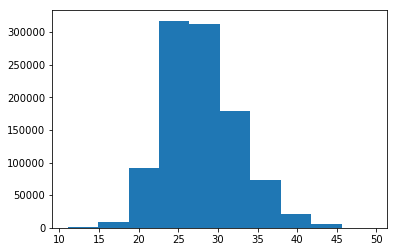

In [29]:
# Bmi Histogram
printmd('**Bmi**')
n, bins, patches = plt.hist(
    list(bmi_steps['bmi'].values), bins = 10)
plt.show()

**Steps**

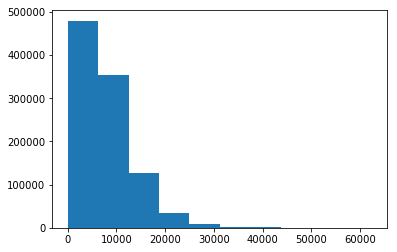

In [30]:
# Steps Histogram
printmd('**Steps**')
n, bins, patches = plt.hist(
    list(bmi_steps['steps'].values), bins = 10)
plt.show()

In [31]:
# Read users data
with open('../data/filtered/users_filter.pickle', 'rb') as f:
    users = pd.DataFrame(pickle.load(f))

**Users sex**

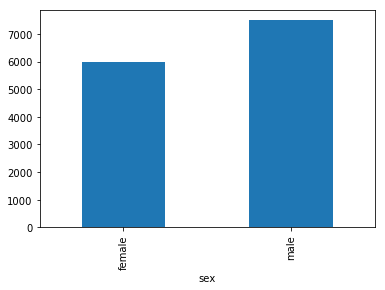

sex
female    6004
male      7500
Name: user_id, dtype: int64


In [32]:
# Users sex Histogram
printmd('**Users sex**')
# Users per sex
users = users[users.user_id.isin(bmi_steps['user_id'])]
users_sex = users.groupby('sex')['user_id'].count()
users_sex.plot(kind='bar')
plt.show()
print(users_sex)

**Users birthday**

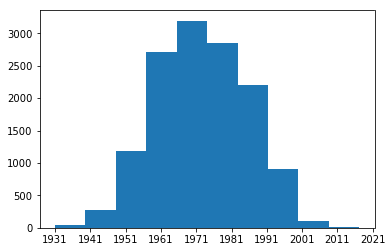

In [33]:
# Users birthday Histogram
printmd('**Users birthday**')
plt.hist(list(users['birthday'].values), bins = 10)
plt.show()